The goal of this program challenge is to predict the probability of customers churn on one of BCG clients called PowerCo. PowerCo is a company that focus on supplying gas and electricity for SME( Small Medium Enterprises) and residential customers. They want to derive an effective decision to the declining customers lately by collaboration with BCG. One hypothesis that likely to happen of the customers churn during period of January to March 2016 is the price sensitiviy and the issue of power-liberalization market in Europe. We, as consultant want to understand the data better and derive actionable insights through the hypothesis whether we should consider marketing strategy that PowerCo is trying to do by offering 20% discount to the customers churn. Is it an effective way to do or any other solutions that we can deliver to the client?. Because this is a classification problem, we will be using one or more classification algorithms such as Logistic Regression, Decision tree, or Random Forest by always checking a few importants parts such as overfitting or underfitting model.

# CUSTOMER RETENTION PROJECT

<b>ATRIBUTES OF THE DATASET</b>

<b>List of the columns (40)</b>
    
- "id" contact id

- "activity_new" category of the company's activity

- "campaigndiscele" code of the electricity campaign the customer last subscribed to

- "channel_sales" code of the sales channel

- "cons_12m" electricity consumption of the past 12 months

- "consgas12m" gas consumption of the past 12 months

- "conslastmonth" electricity consumption of the last month


- "date_activ" date of activation of the contract

- "date_end" registered date of the end of the contract

- "datefirstactiv" date of the first contract of the client

- "datemodifprod" date of last modification of the product

- "date_renewal" date of the next contract renewal


- "forecastbasebill_ele" forecasted electricity bill baseline for next month

- "forecastbasebill_year" forecasted electricity bill baseline for calendar year

- "forecastbill12m" forecasted electricity bill baseline for 12 months

- "forecast_cons" forecasted electricity consumption for next month

- "forecastcons12m" forecasted electricity consumption for next 12 months

- "forecastconsyear" forecasted electricity consumption for next calendar year

- "forecastdiscountenergy" forecasted value of currecurrent discount

- "forecastmeterrent_12m" forecasted bill of meter rental for the next 12 months

- "forecastpriceenergy_p1" forecasted energy price for 1st period

- "forecastpriceenergy_p2" forecasted energy price for 2nd period

- "forecastpricepow_p1" forecasted power price for 1st period


- "has_gas indicated" if clieclient is also a gas client

- "imp_cons" current paid consumption

- "margingrosspow_ele" gross margin on power subscription

- "marginnetpow_ele" net margin on power subscription

- "nbprodact" number of active products and services

- "net_margin" total net margin

- "numyearsantig" antiquity of the client (in number of years)

- "origin_up" code of the electricity campaign the customer first subscribed to

- "pow_max" subscribed power

- "price_date' reference date

- "pricep1var" price of energy for the 1st period

- "pricep2var" price of energy for the 2nd period

- "pricep3var" price of energy for the 3rd period

- "pricep1fix" price of power for the 1st period

- "pricep2fix" price of power for the 2nd period

- "pricep3fix" price of power for the 3rd period

- "churn" has the client churned over the next 3 months

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

import datetime
import seaborn as sns
import xgboost as xgb

import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, mean_absolute_error, mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import zscore as zscore

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<Figure size 1600x800 with 0 Axes>

# E.D.A.
We start the exploratory data analysis by loading the dataset using pandas, checking missing values, doing feature engineering, checking outliers and comparing between univariate and bivariate features

## Loading the data in to dataframes

### Historical customer data (H_C_D): Customer data such as usage, sign up date, forecasted usage etc 

In [2]:
#train_data
H_C_D=pd.read_csv('ml_case_training_data.csv')
H_C_D

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [3]:
H_C_D.shape

(16096, 32)

In [4]:
H_C_D.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [5]:
summary = H_C_D.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
campaign_disc_ele,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,16096.0,194804.384630,679515.083441,-125276.000000,5906.250000,15332.500000,50221.500000,1.609711e+07
cons_gas_12m,16096.0,31911.636742,177588.456233,-3037.000000,0.000000,0.000000,0.000000,4.188440e+06
cons_last_month,16096.0,19461.536158,82356.756560,-91386.000000,0.000000,901.000000,4127.000000,4.538720e+06
forecast_base_bill_ele,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_base_bill_year,3508.0,335.843857,649.406000,-364.940000,0.000000,162.955000,396.185000,1.256608e+04
forecast_bill_12m,3508.0,3837.441866,5425.744327,-2503.480000,1158.175000,2187.230000,4246.555000,8.112263e+04
forecast_cons,3508.0,206.845165,455.634288,0.000000,0.000000,42.215000,228.117500,9.682890e+03
forecast_cons_12m,16096.0,2370.555949,4035.085664,-16689.260000,513.230000,1179.160000,2692.077500,1.038019e+05
forecast_cons_year,16096.0,1907.347229,5257.364759,-85627.000000,0.000000,378.000000,1994.250000,1.753750e+05


### Historical pricing data (H_P_D): variable and fixed pricing data etc 

In [6]:
#train_hist
H_P_D=pd.read_csv('ml_case_training_hist_data.csv')
H_P_D

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [7]:
H_P_D.shape

(193002, 8)

In [8]:
H_P_D.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [9]:
summary = H_P_D.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
price_p1_var,191643.0,0.140991,0.025117,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,191643.0,0.054412,0.050033,0.000000,0.000000,0.085483,0.101780,0.229788
price_p3_var,191643.0,0.030712,0.036335,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,191643.0,43.325546,5.437952,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,191643.0,10.698201,12.856046,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,191643.0,6.455436,7.782279,-0.065172,0.000000,0.000000,16.226389,17.458221


### Churn indicator (CH_I): whether each customer has churned or not

In [10]:
#train_out
CH_I=pd.read_csv('ml_case_training_output.csv')
CH_I

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0
...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0


In [11]:
CH_I.shape

(16096, 2)

In [12]:
CH_I.dtypes

id       object
churn     int64
dtype: object

In [13]:
summary = CH_I.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
churn,16096.0,0.099093,0.298796,0.0,0.0,0.0,0.0,1.0


## Overview of datasets

In [14]:
H_C_D.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [15]:
H_P_D.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [16]:
CH_I.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


## Cleaning data

Creating a function to look at the unique values of each columns by dataframe

In [17]:
def print_unique_col_values(dataframe):
    for column in dataframe:
        if dataframe[column].dtypes=='object':
            print (f'{column}: {dataframe[column].unique()}')

In [18]:
print_unique_col_values(H_C_D)

id: ['48ada52261e7cf58715202705a0451c9' '24011ae4ebbe3035111d65fa7c15bc57'
 'd29c2c54acc38ff3c0614d0a653813dd' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']
activity_new: ['esoiiifxdlbkcsluxmfuacbdckommixw' nan 'sfisfxfcocfpcmckuekokxuseixdaoeu'
 'sscfoipxikopfskekuobeuxkxmwsuucb' 'cssldxpacdmuuaulamxdekcokibauube'
 'ppcxfxbffsxaakxamcdpexdoxulfwwae' 'kkklcdamwfafdcfwofuscwfwadblfmce'
 'apdekpcbwosbxepsfxclislboipuxpop' 'xwkaesbkfsacseixxksofpddwfkbobki'
 'lckfspcixfmlwudlisbaiacuioicciam' 'daobdssbkieoukwxbopxiiospudkopwl'
 'cccpsslxcemdlomsaffxsecccbxpdkax' 'kwuslieomapmswolewpobpplkaooaaew'
 'ifppdlcfssupdcsdcclkoubulccouwml' 'mwmuuaeloxbawummwfwcmxckmsfibpwk'
 'almlfkoedpwfdmmsebsdwueskducuiok' 'wlxfbefauebfbauopppswxppaafdkoap'
 'cwkwaxadbfukekuspislmbipbkxdudla' 'cluecxlameloamldmasudocsbmaoamdw'
 'pmccdfmdxpmdeodsasdeboedildifmlp' 'paoauaefwcbedmiowwmokakuisslckbd'
 'bapcuxcousodpaabofsesslupodaapcx' 'dupxuibdflmsk

In [19]:
print_unique_col_values(H_P_D)

id: ['038af19179925da21a25619c5a24b745' '31f2ce549924679a3cbb2d128ae9ea43'
 '36b6352b4656216bfdb96f01e9a94b4e' ... 'd00da2c0c568614b9937791f681cd7d7'
 '045f94f0b7f538a8d8fae11080abb5da' '16f51cdc2baa19af0b940ee1b3dd17d5']
price_date: ['2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01']


In [20]:
print_unique_col_values(CH_I)

id: ['48ada52261e7cf58715202705a0451c9' '24011ae4ebbe3035111d65fa7c15bc57'
 'd29c2c54acc38ff3c0614d0a653813dd' ... '10e6828ddd62cbcf687cb74928c4c2d2'
 '1cf20fd6206d7678d5bcafd28c53b4db' '563dde550fd624d7352f3de77c0cdfcd']


### Finding missing values

<b>Check H_C_D Dataset<b>

In [21]:
H_C_D.isnull().sum().sum()

93633

In [22]:
# H_C_D HAVE 93633 MISSING VALUES OF 16096 INSTANCES, WE WILL FIND OUT WHICH COLUMNS ARE MISSING THE MOST

def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/H_C_D.isnull().count()*100)
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(H_C_D)

,campaign_disc_ele,forecast_bill_12m,date_first_activ,forecast_cons,forecast_base_bill_ele,forecast_base_bill_year,activity_new,channel_sales,date_modif_prod,forecast_price_pow_p1,forecast_price_energy_p2,forecast_price_energy_p1,forecast_discount_energy,origin_up,date_renewal,net_margin,margin_net_pow_ele,margin_gross_pow_ele,pow_max,date_end,imp_cons,nb_prod_act,num_years_antig,id,has_gas,forecast_meter_rent_12m,forecast_cons_year,date_activ,cons_last_month,cons_gas_12m,cons_12m,forecast_cons_12m
Total,16096,12588,12588,12588,12588,12588,9545,4218,157,126,126,126,126,87,40,15,13,13,3,2,0,0,0,0,0,0,0,0,0,0,0,0
Percent,100.0,78.205765,78.205765,78.205765,78.205765,78.205765,59.300447,26.205268,0.975398,0.782803,0.782803,0.782803,0.782803,0.540507,0.248509,0.093191,0.080765,0.080765,0.018638,0.012425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float64,float64,object,float64,float64,float64,object,object,object,float64,float64,float64,float64,object,object,float64,float64,float64,float64,object,float64,int64,int64,object,object,float64,int64,object,int64,int64,int64,float64


In [23]:
H_C_D_df =H_C_D.copy()

<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

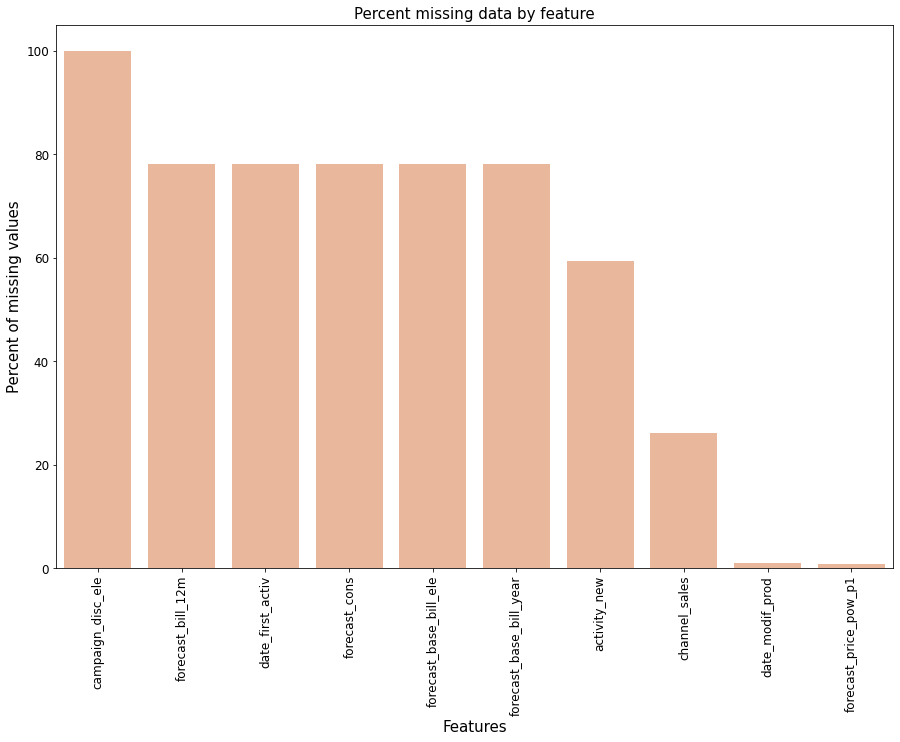

In [24]:
missing_values_count = (H_C_D_df.isnull().sum()/H_C_D.isnull().count()*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
base_color = sns.color_palette("rocket_r")[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

6 features have more than 70% of missing values

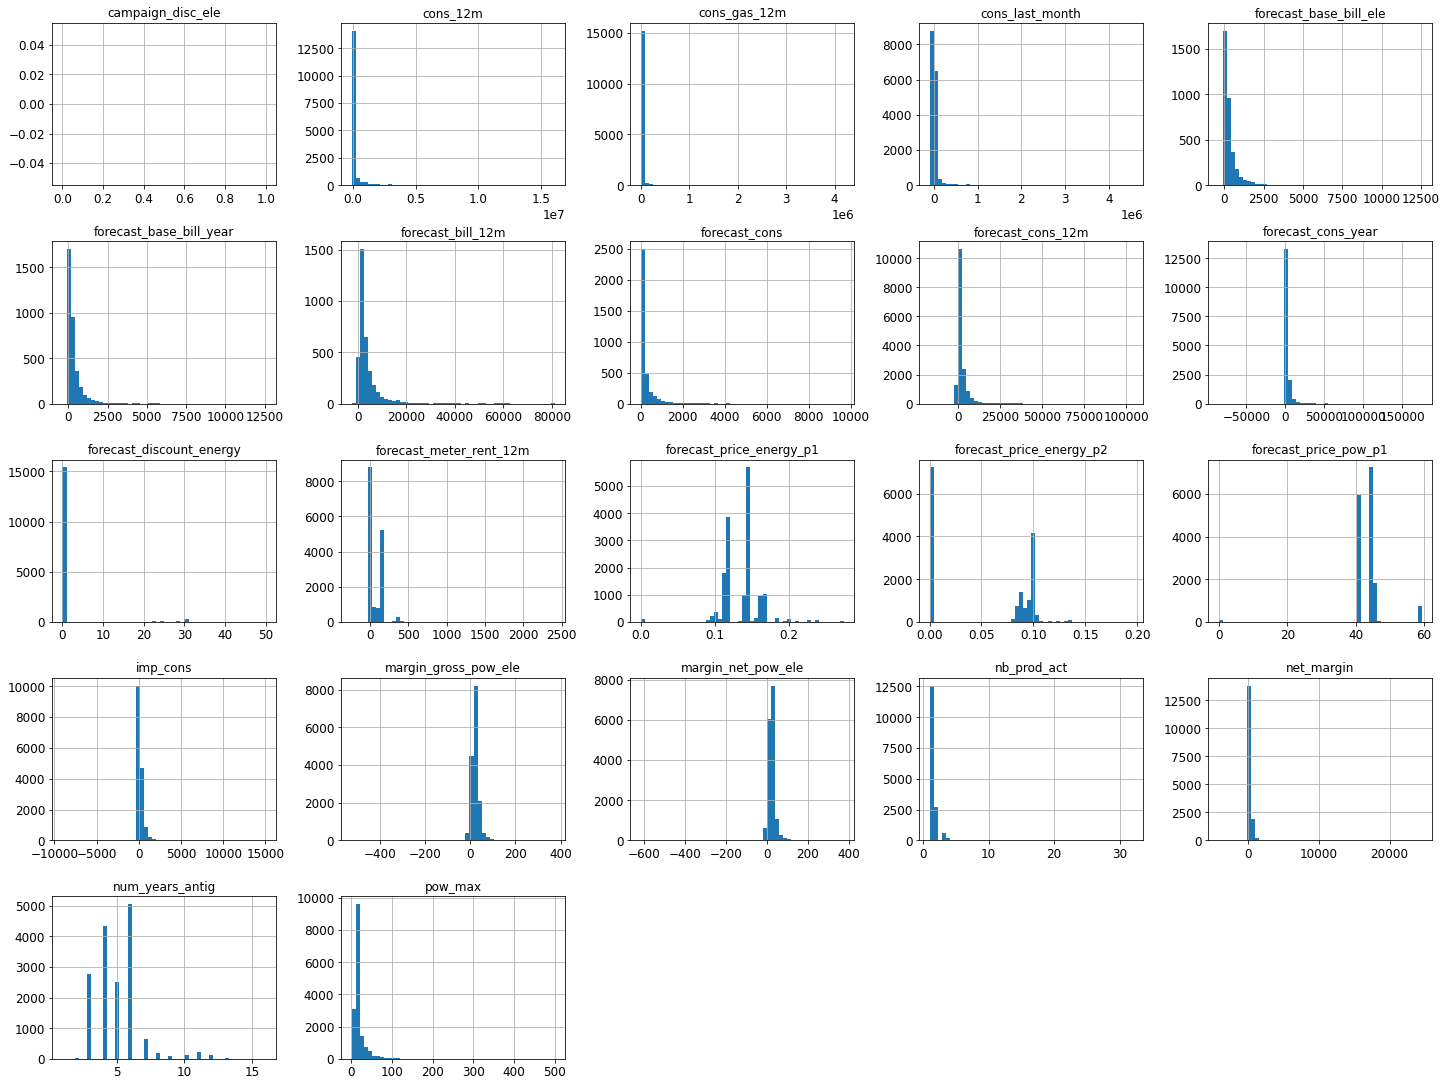

In [25]:
H_C_D_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [26]:
H_C_D_df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


8 rows × 22 columns. 
Most of the features are skewed, years of antiquity are 5 followed by net margin aprox. $217

<b>Check H_P_D Dataset<b>

In [27]:
H_P_D_df = H_P_D.copy()
statistics_data =(pd.DataFrame(H_P_D_df.describe())).T
statistics_data

,count,mean,std,min,25%,50%,75%,max
price_p1_var,191643.0,0.140991,0.025117,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,191643.0,0.054412,0.050033,0.000000,0.000000,0.085483,0.101780,0.229788
price_p3_var,191643.0,0.030712,0.036335,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,191643.0,43.325546,5.437952,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,191643.0,10.698201,12.856046,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,191643.0,6.455436,7.782279,-0.065172,0.000000,0.000000,16.226389,17.458221



average price of energy for the 1st period is $0.14

average price of energy for the 2st period is $0.05

average price of energy for the 3st period is $0.03

average price of power for the 1st period is $43.32

average price of power for the 2st period is $10.69

average price of power for the 3st period is $6.45



<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

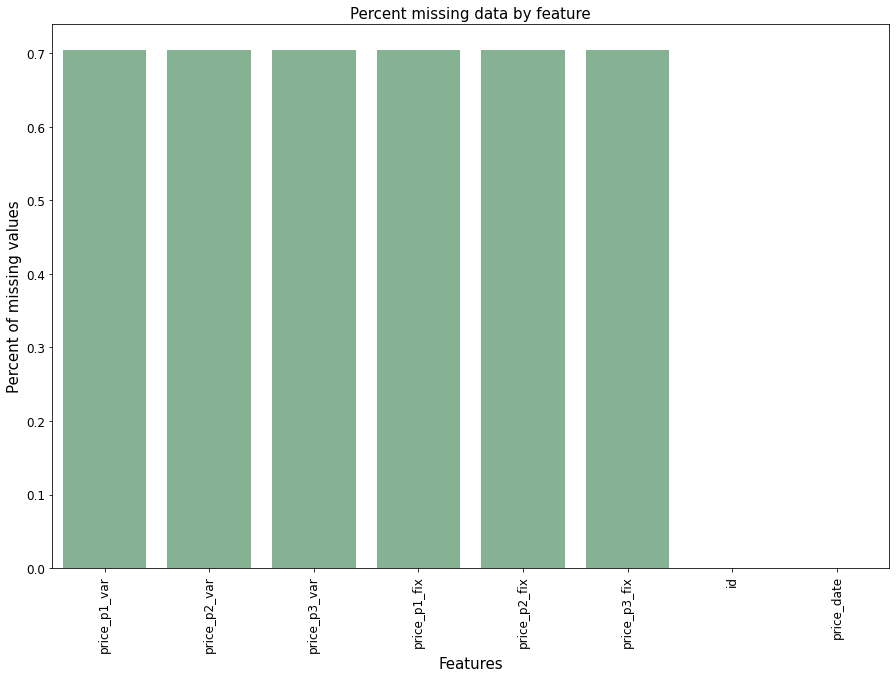

In [28]:
# PLOT OF MISSING VALUES % VS COLUMN_NAMES FROM H_P_D

missing_values_count = (H_P_D.isnull().sum()/H_P_D.isnull().count()*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
base_color = sns.color_palette("crest")[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

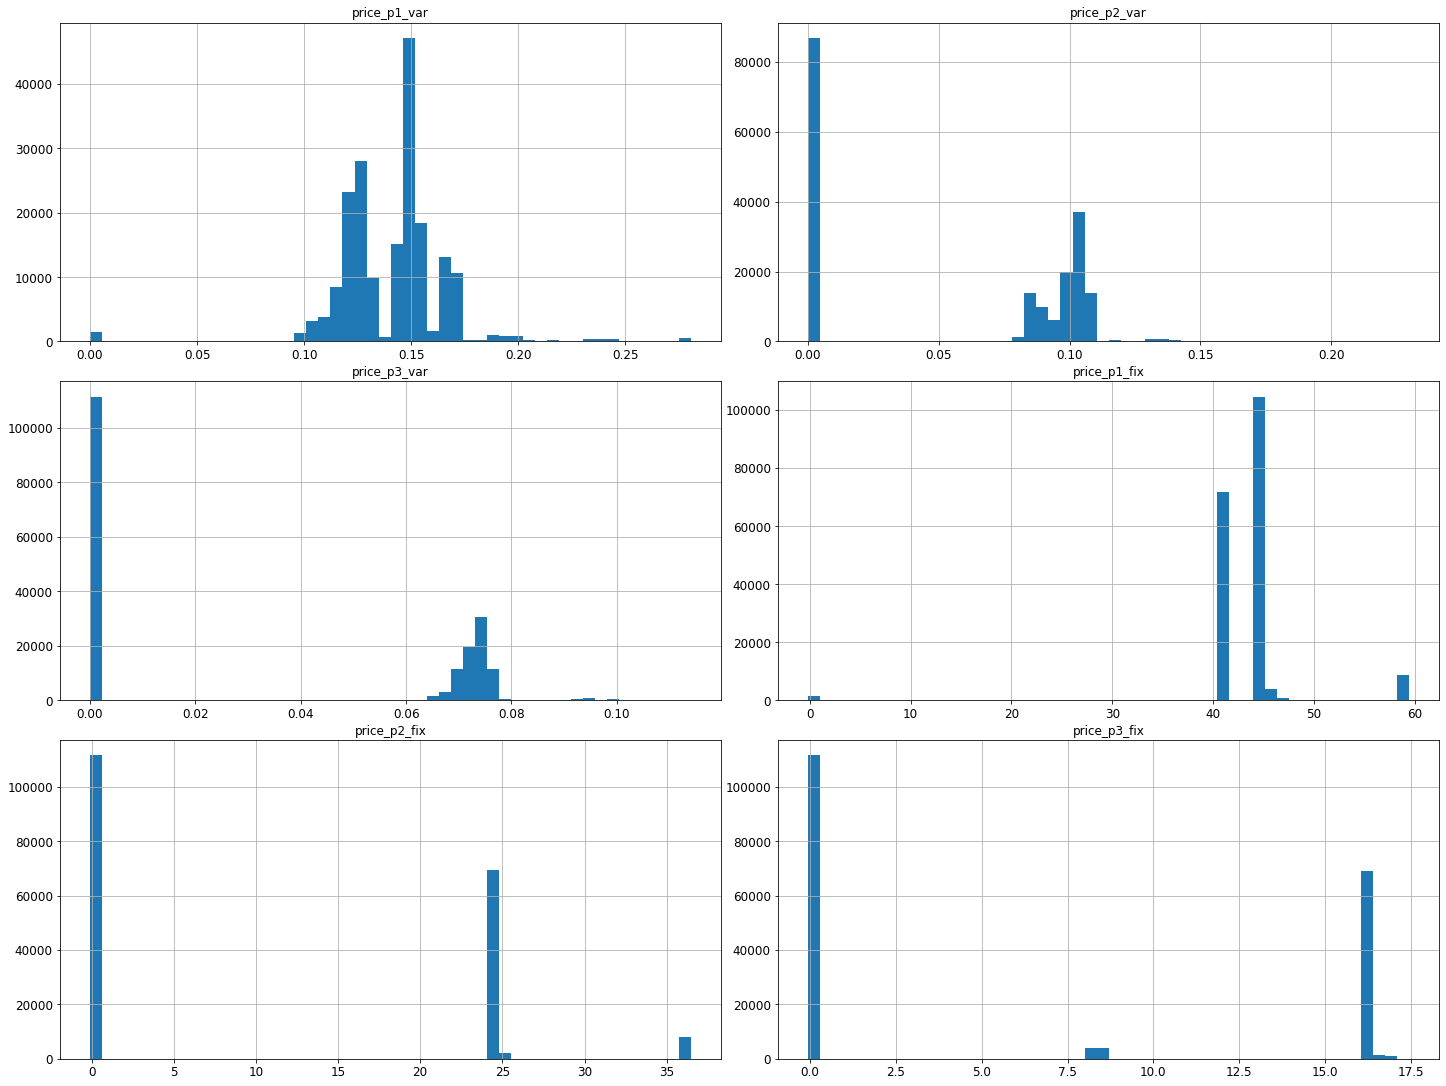

In [29]:
H_P_D_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

<b>Check CH_I Dataset<b>

<AxesSubplot:xlabel='churn', ylabel='count'>

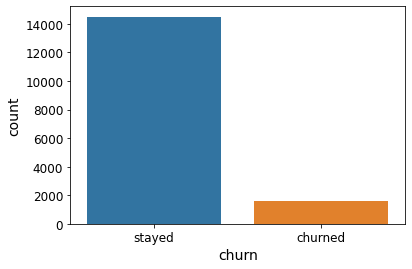

In [30]:
CH_I["churn"] = CH_I["churn"].replace({0:"stayed",1:"churned"})
CH_I["churn"].head()
sns.countplot(data=CH_I, x='churn', order=CH_I.churn.value_counts().index)

<b>      ≈ 10% of customers are likely to churn based on the output dataset in the first 3 months. <b>



<B>Dealing with Missing Values<B>

H_C_P and H_P_D datasets have many missing values. We will visualize and deal with the missing values whether we should remove or impute them with mean or median.

<b>H_P_D Datase<b>

In [31]:
# CHECK FOR NEGATIVE VALUES ON POWER PRICES

negative_prices_col = ["price_p1_fix","price_p2_fix","price_p3_fix"]
H_P_D_df[negative_prices_col].apply(abs)

H_P_D_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We changed the negative values of price of energy into positive

<AxesSubplot:>

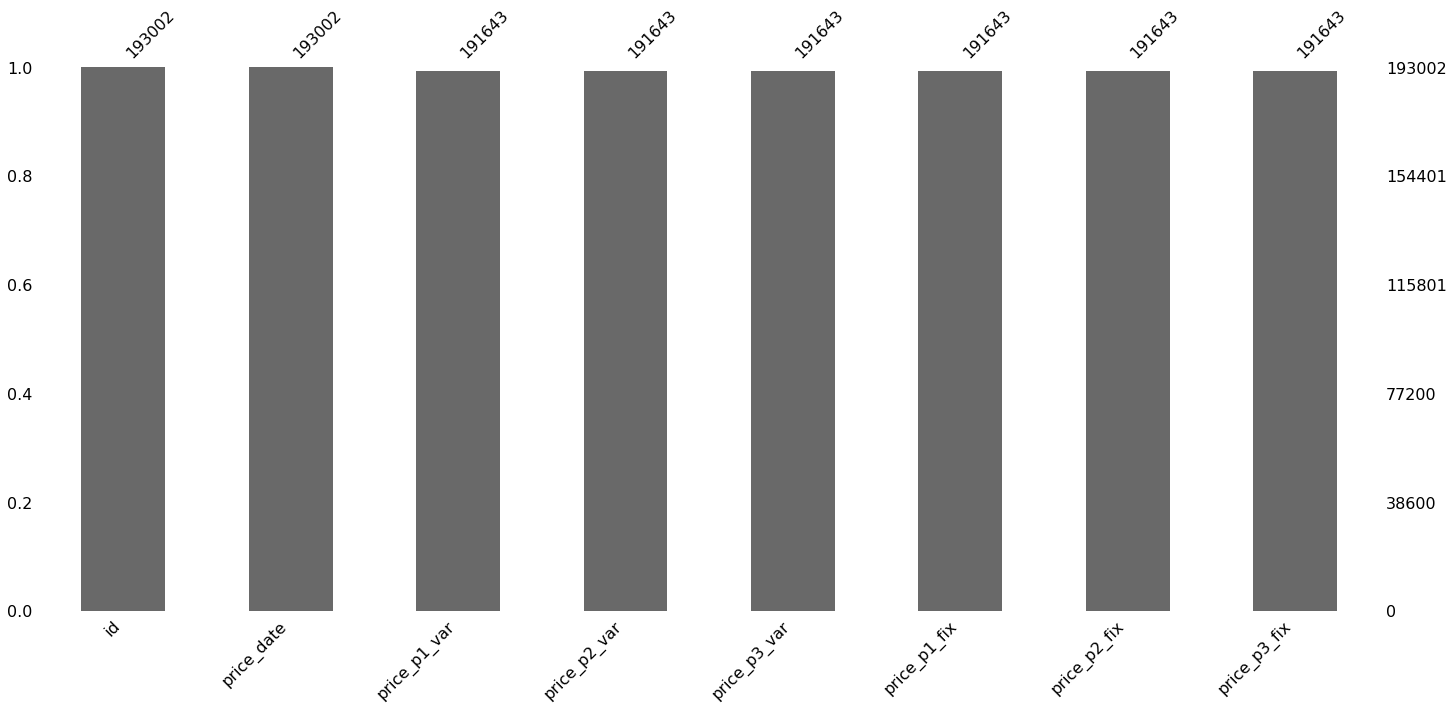

In [32]:
import missingno as msno
msno.bar(H_P_D_df)

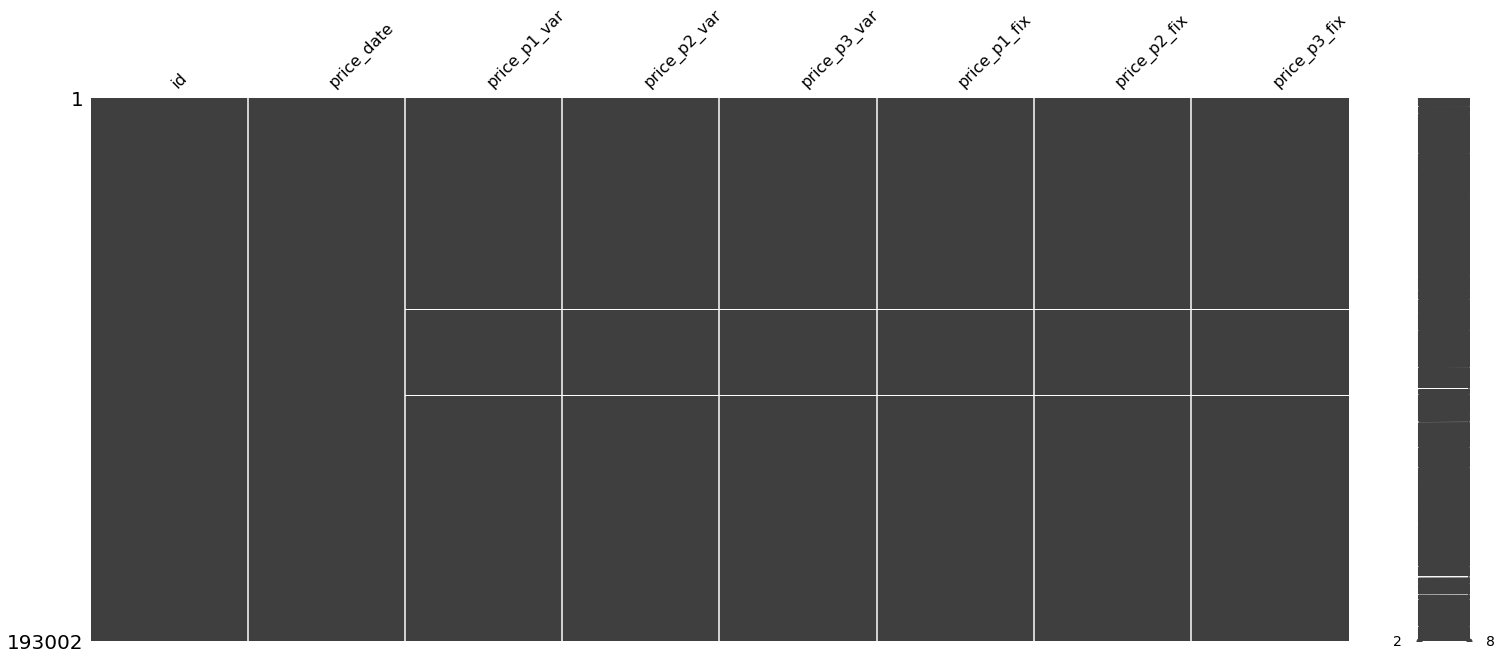

In [33]:
sorted = H_P_D_df.sort_values(by = ["id","price_date"])
msno.matrix(sorted)
gray_patch = mpatches.Patch(color='blue', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing')

After doing sorted by "id" and "price_date" we realized the <b>price columns<b> are mising.

<b>CORRELATION ON COLUMNS OF H_P_D DATASET IN HEATMAP<b>

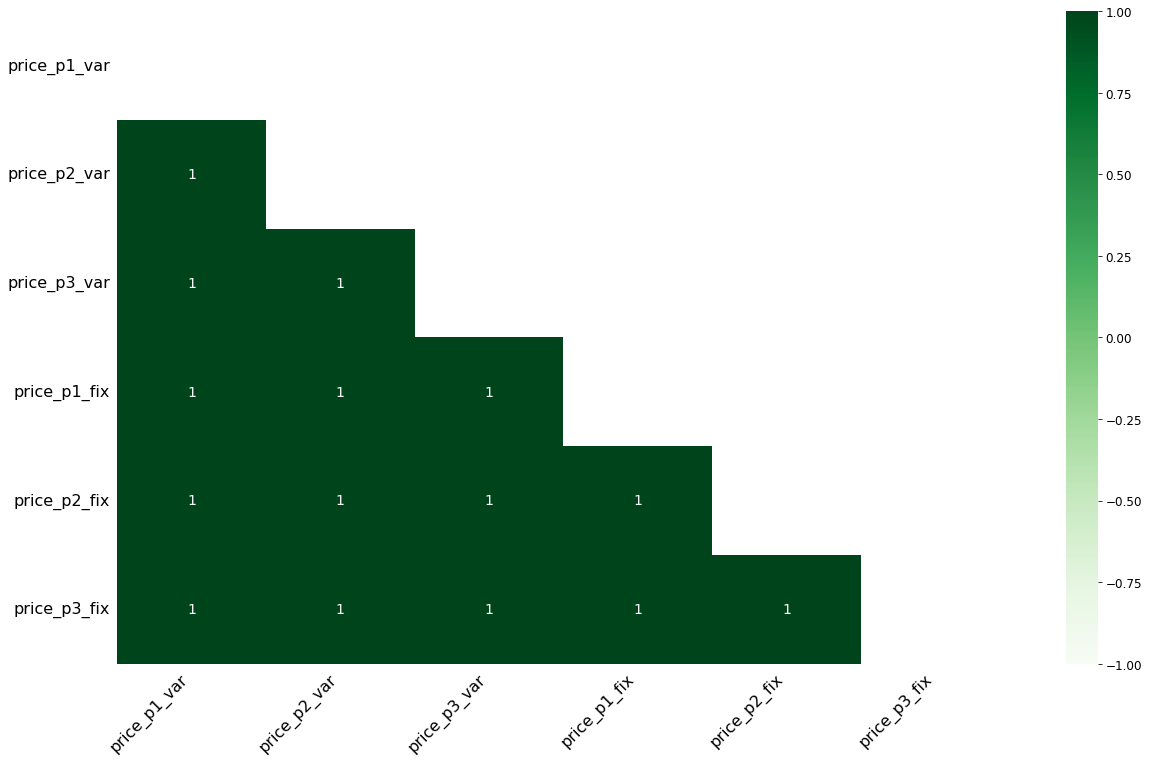

In [34]:
msno.heatmap(H_P_D_df,cmap="Greens")
plt.show()

In [35]:
# CHECK ID WITH MISSING VALUES ON THE OTHER COLUMNS
H_P_D_df_null =H_P_D_df[H_P_D_df.isnull().any(axis=1)].index.values.tolist()

In [36]:
# GET THE MISSING VALUES DATA
missing_values = H_P_D_df.iloc[H_P_D_df_null,:]
missing_values.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# CHECK THE AMOUNT OF MISSING VALUES 
missing_values.shape

(1359, 8)

<b>There are 1359 missing values (not randomly) on the history dataset because there is a relationship between missing ones and their values, indicated from a hig multicollinearity among the columns on the heatmap as well<b>

### Filling missing values (Imputation process)

In [38]:
## FOR PRICE COLUMNS (H_P_D_df)
H_P_D_df.fillna(method="bfill",inplace=True)
H_P_D_df.iloc[H_P_D_df_null,3:9].head()

,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,0.000000,0.000000,44.266930,0.00000,0.000000
221,0.000000,0.000000,44.444710,0.00000,0.000000
377,0.088643,0.000000,44.444710,0.00000,0.000000
413,0.102802,0.072713,40.728885,24.43733,16.291555
461,0.000000,0.000000,44.444710,0.00000,0.000000


In [39]:
H_P_D_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_p1_var,193002.0,0.141004,0.025107,0.000000,0.125976,0.146033,0.151635,0.280700
price_p2_var,193002.0,0.054390,0.050040,0.000000,0.000000,0.085450,0.101780,0.229788
price_p3_var,193002.0,0.030698,0.036335,0.000000,0.000000,0.000000,0.072558,0.114102
price_p1_fix,193002.0,43.326161,5.434603,-0.177779,40.728885,44.266930,44.444710,59.444710
price_p2_fix,193002.0,10.692753,12.854720,-0.097752,0.000000,0.000000,24.339581,36.490692
price_p3_fix,193002.0,6.452467,7.781830,-0.065172,0.000000,0.000000,16.226389,17.458221


### Merging dataframes (H_P_D with CH_I) on "id" column

In [40]:
H_P_D_CH_I_df = H_P_D_df.merge(CH_I,on=["id"])
H_P_D_CH_I_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,stayed


### Checking Missingness on H_C_D data

<AxesSubplot:>

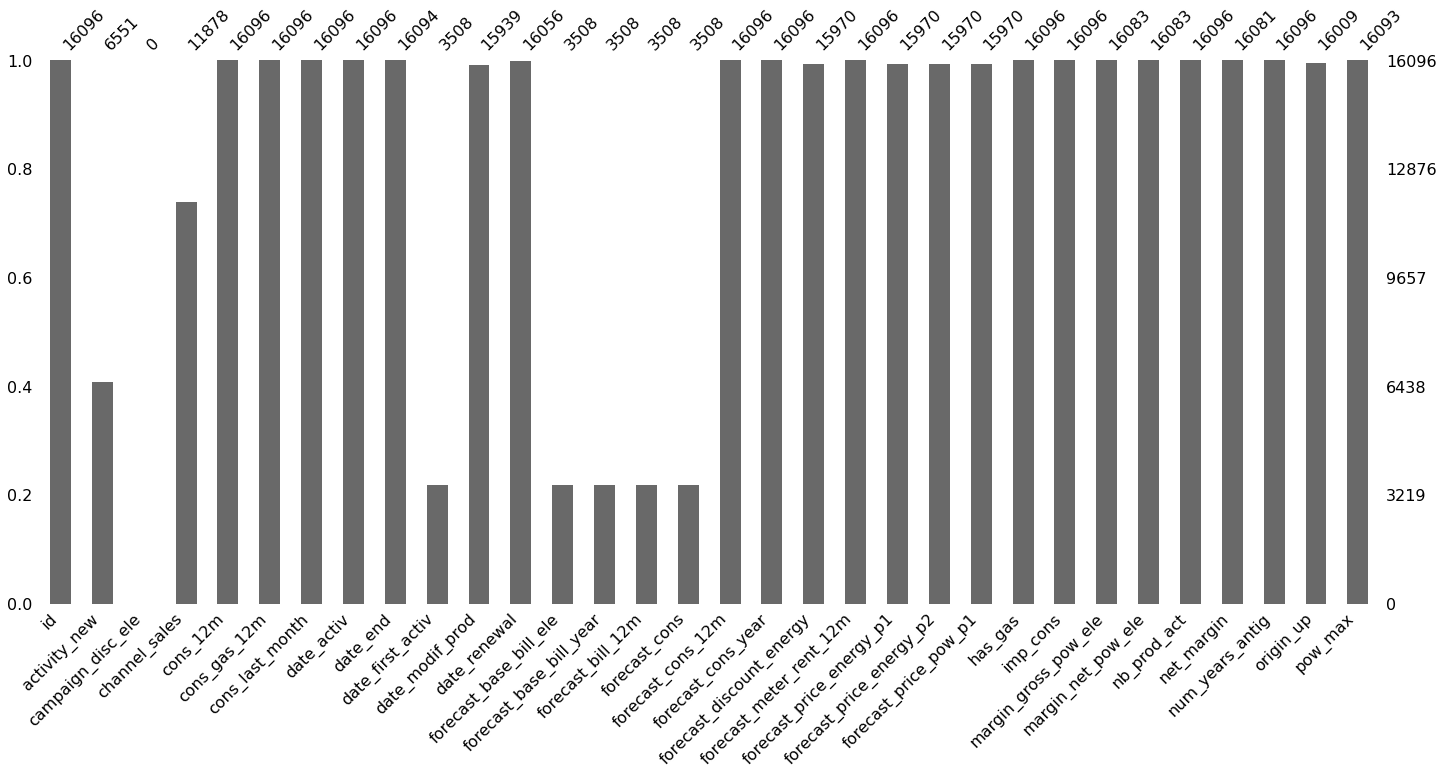

In [41]:
msno.bar(H_C_D_df)

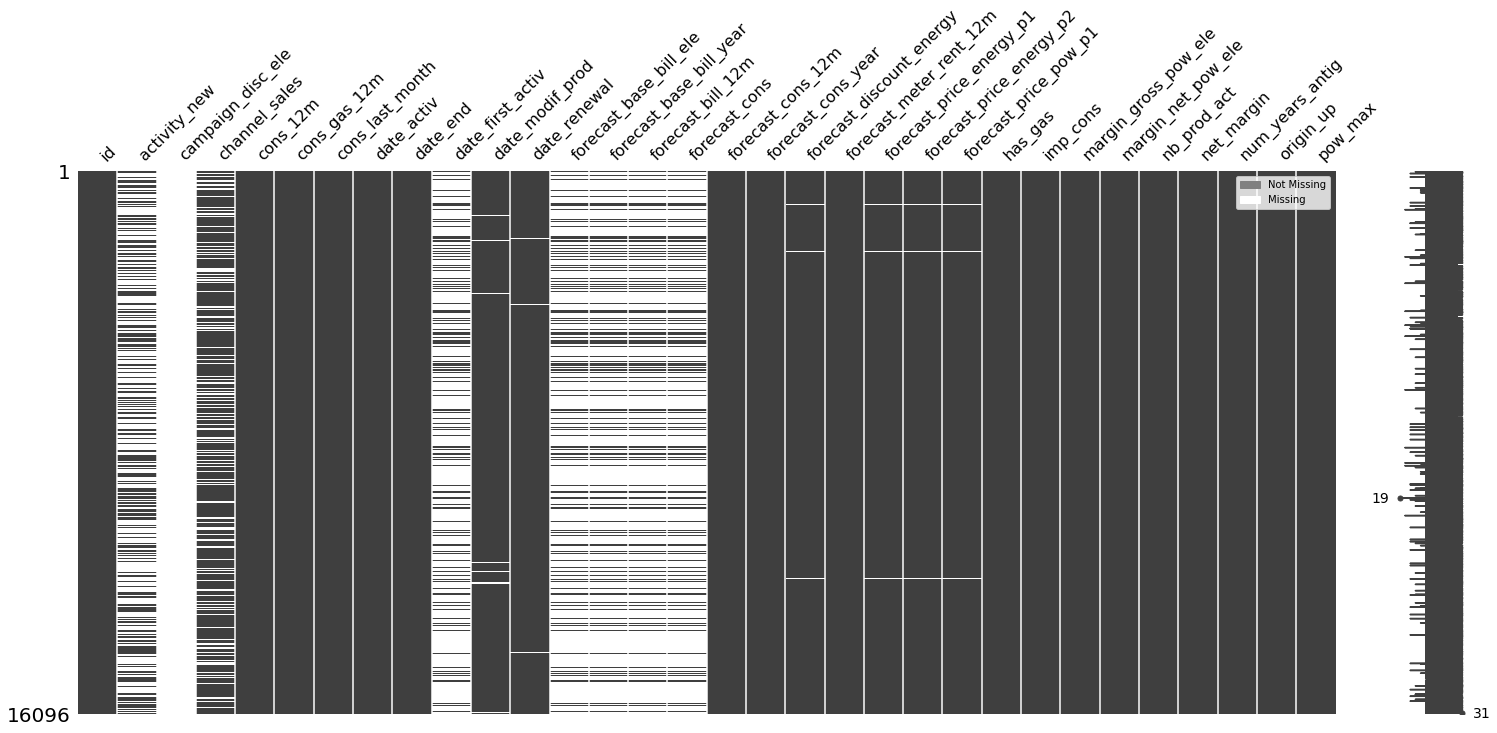

In [42]:
msno.matrix(H_C_D_df)
gray_patch = mpatches.Patch(color='gray', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[gray_patch, white_patch])
plt.show()

<AxesSubplot:>

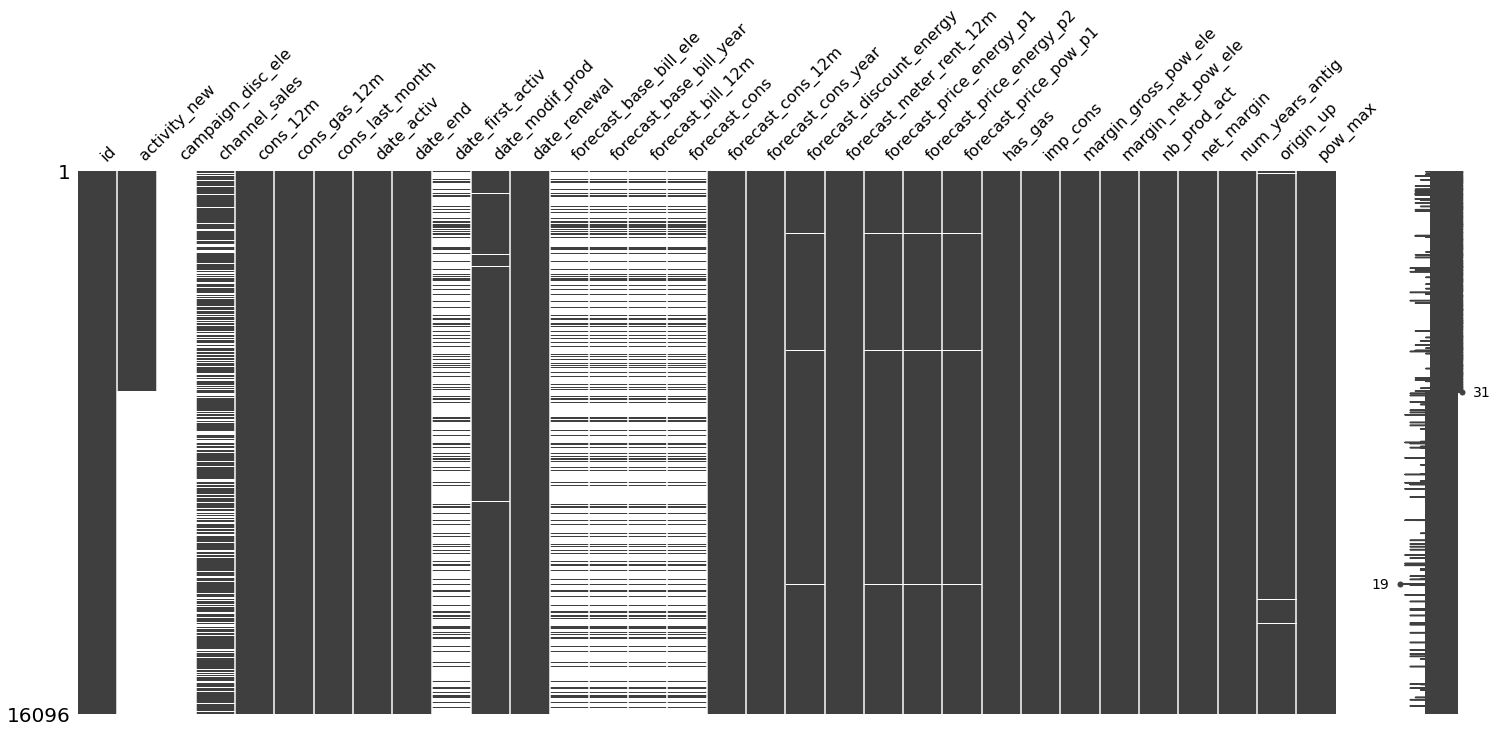

In [43]:
sorted_main = H_C_D_df.sort_values('activity_new')
msno.matrix(sorted_main)

<b>Check correlation among missing values<b>

<AxesSubplot:>

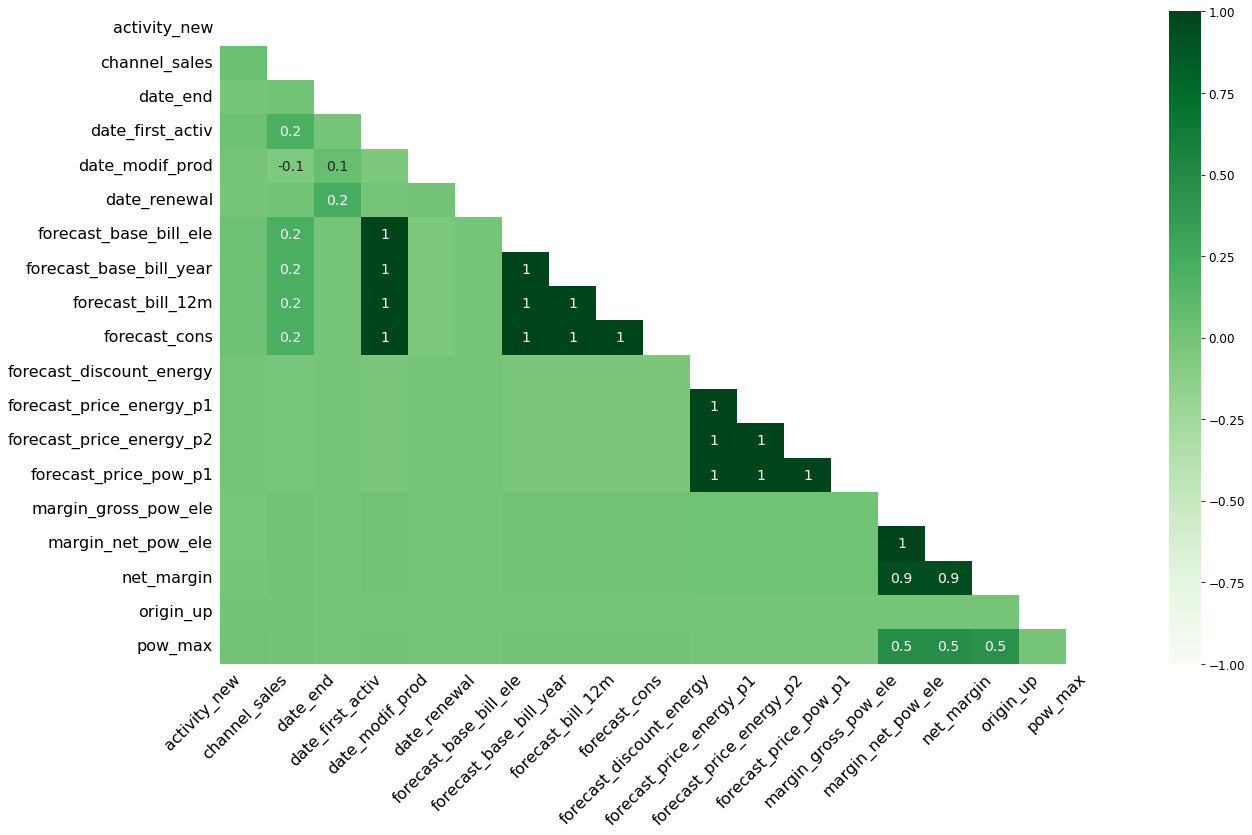

In [44]:
 msno.heatmap(H_C_D_df,cmap="Greens")

<b>The dendrogram bellow shows the deeper understanding about correlation of each features based on the top-down approach like "net_margin" and "margin_net_pole_ele" that have higher similarity because of closer distance<b>

<AxesSubplot:>

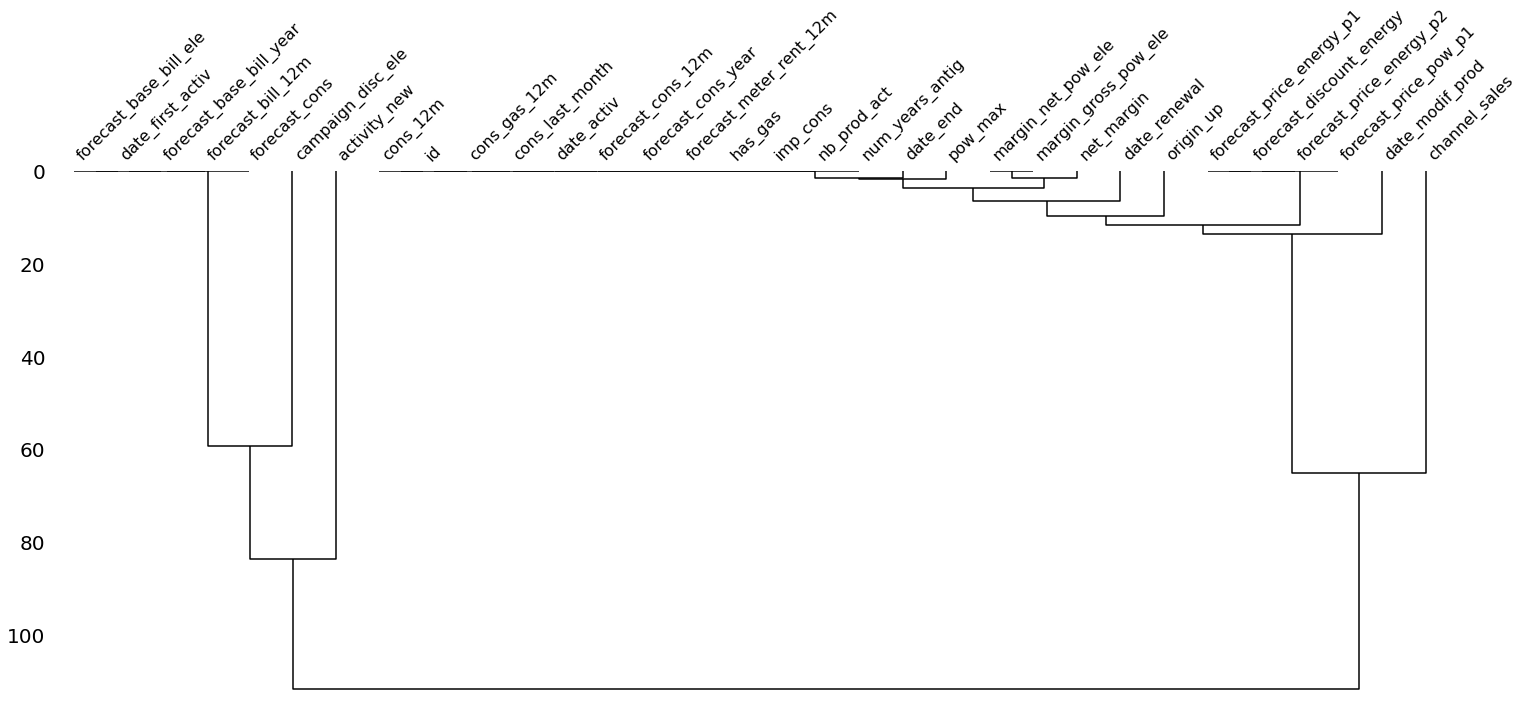

In [45]:
msno.dendrogram(H_C_D_df)

In [46]:
# Checking the correlation between "date_activ" and "date_first_activ", either could potentially change the values
date_active_first_compare = ["date_activ","date_first_activ"]
date_compare = H_C_D_df[date_active_first_compare]
date_compare.isnull().sum()

date_activ              0
date_first_activ    12588
dtype: int64

we can see there are different ways of comparing the dates between these two variables like for the date in february compared to july, It will make the data bias.

In [47]:
def compare_date(df,column):
    date_compare = df[column]
    date_compare_cc =date_compare.dropna(subset=[column[1]],how="any",inplace=False)
    date_compare_cc[column[0]].equals(date_compare_cc[column[1]])
    date_compare_desc = date_compare_cc.describe()
    return date_compare_desc

columns = ['date_activ','date_first_activ']
compare_date(H_C_D_df,columns)

,date_activ,date_first_activ
count,3508,3508
unique,1097,1133
top,2012-02-01,2009-07-14
freq,31,34


### Dropping columns

In [48]:
H_C_D_df_drop_columns = H_C_D_df.drop(labels=["activity_new","campaign_disc_ele"],axis=1)

In [49]:
dropna_columns = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
                  'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
H_C_D_df_drop_columns.dropna(subset=dropna_columns,how="any",inplace=True)

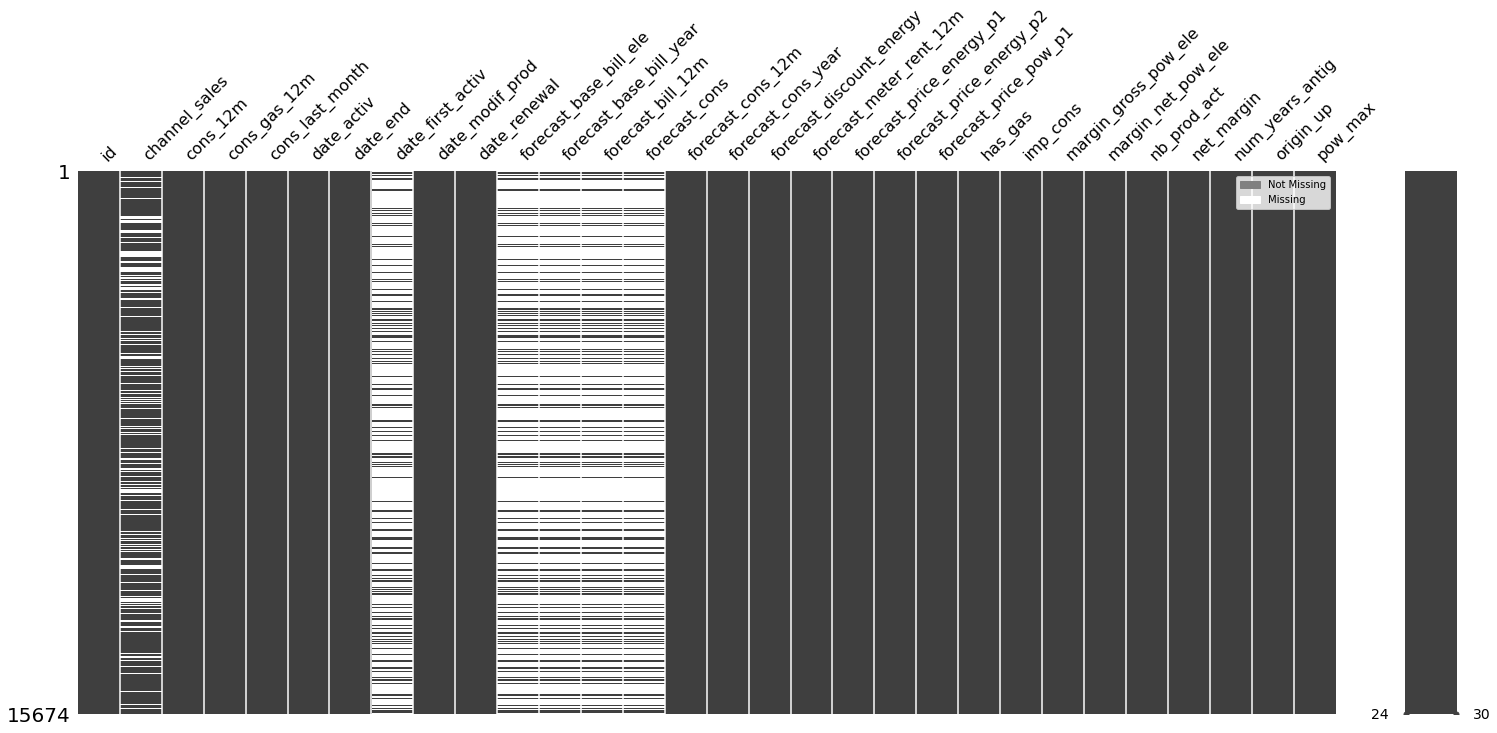

In [50]:
msno.matrix(H_C_D_df_drop_columns)
gray_patch = mpatches.Patch(color='gray', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing')
plt.legend(handles=[gray_patch, white_patch])
plt.show()

<AxesSubplot:>

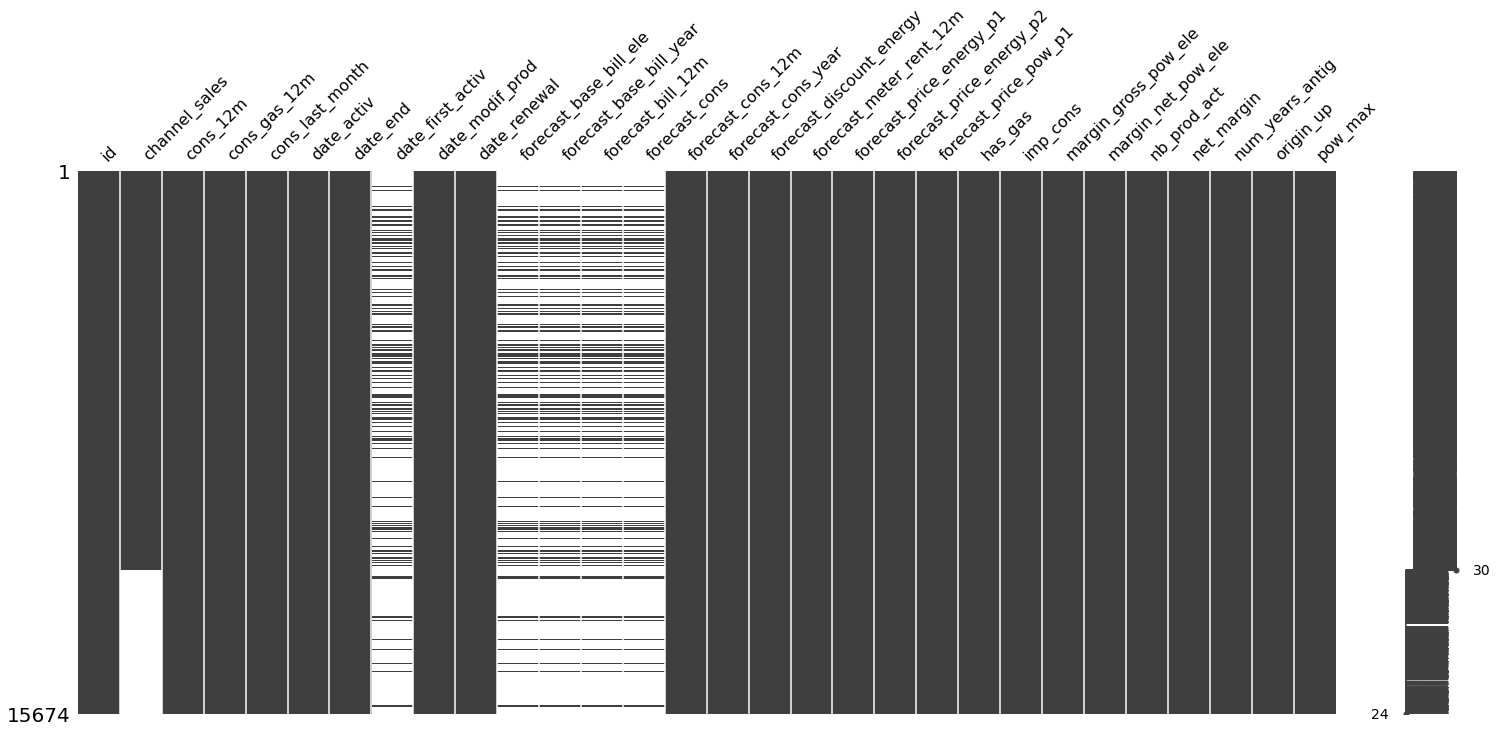

In [51]:
sorted_main = H_C_D_df_drop_columns.sort_values("channel_sales")
msno.matrix(sorted_main)

<AxesSubplot:>

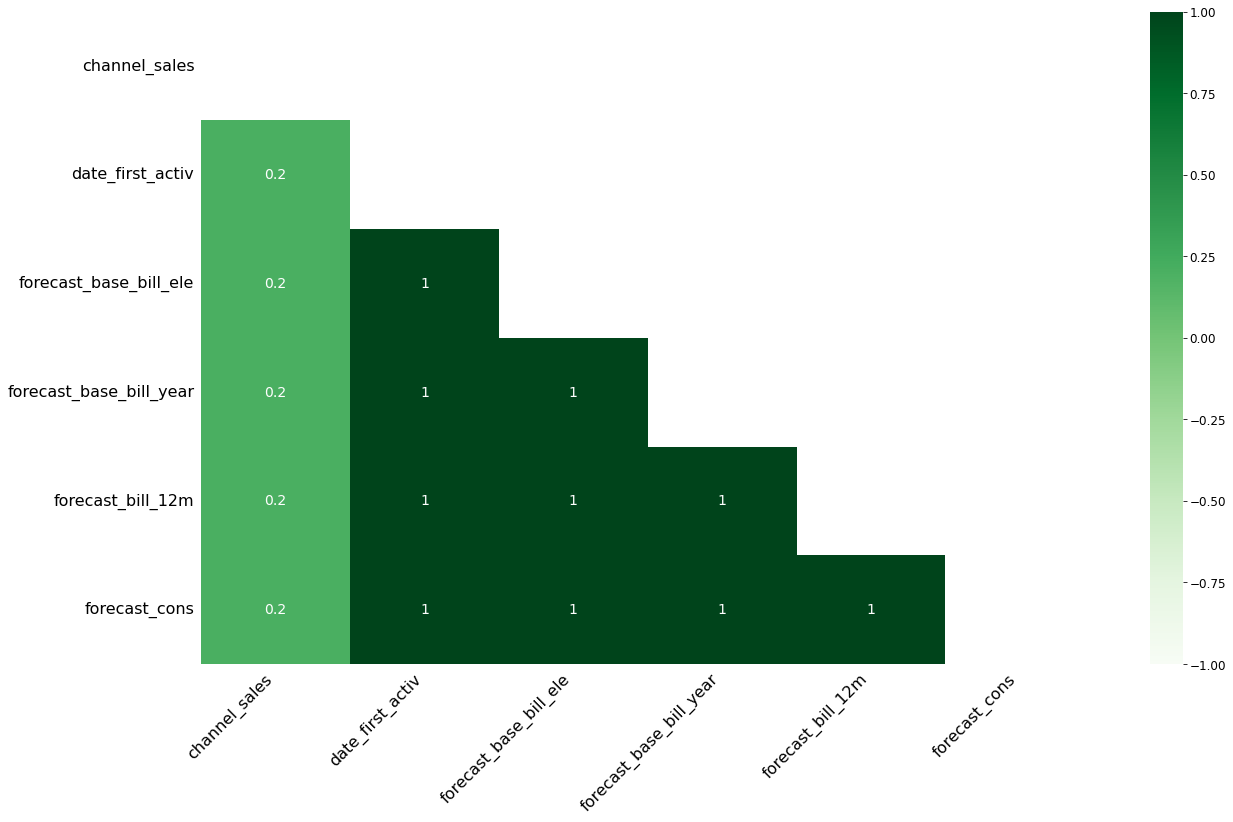

In [52]:
# Check correlation
msno.heatmap(H_C_D_df_drop_columns,cmap="Greens")

<b>Based on the graph above, we can conclude a few notes related missing values as follows:</b>


<b>(MCAR)</b> Missing completely at random. When data are MCAR, the fact that the data are missing is independent of the observed and unobserved data.
<b>(MAR)</b>  Missing at random occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.    
<b>(MNAR)</b> Missing not at random (also known as nonignorable nonresponse) is data that is neither MAR nor MCAR (ie the value of the variable that's missing is related to the reason it's missing).  

- "activity_new" is <b>(MCAR)</b> and has low correlation with any of the variables. we can <b>drop</b> this feature
- "channel_sales" is <b>(MAR)</b>  and has correlation with a few variables.
- "campaign_disc_elec" is <b>(MCAR)</b> on all the instances. This depicts that subscribers do not subscribe by campaign offers.
- "date_first_active" is <b>(MAR)</b>  because it could not be replaced by date_activ
- "margin_net_pole_ele" has a strong correlation with margin_gross_pole_ele. it indicates multicollinearity. so does "net_margin" and "margin_gross_pow_ele".
- "pow_up" and "pow_max" are <b>(MCAR)</b> that indicates no correlation and depicts a few mising values. we can drop these variables.
- "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m" and "forecast_cons" have high correlation with "date_first_active"(score 1 in the heatmap).Due to the dates are not identical and it could not be replaced by date_activ, then it is <b>(MNAR)</b> (possibility of systematic missing values).

In [53]:
uncomplete_columns = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']
complete_columns = [cols for cols in H_C_D_df_drop_columns.columns if cols not in uncomplete_columns]
H_C_D_df_cc = H_C_D_df_drop_columns[complete_columns]

### Fixing negative values

In [54]:
numeric = [cols for cols in H_C_D_df_cc.columns if H_C_D_df_cc[cols].dtype == "float64" or H_C_D_df_cc[cols].dtype == "int64"]
H_C_D_df_cc.loc[:,numeric] = H_C_D_df_cc.loc[:,numeric].apply(abs)
H_C_D_df_cc.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,2359.676441,1911.698354,0.976139,70.210965,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,3979.605687,5224.813531,5.124103,78.560454,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,514.045000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,1178.970000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,2677.220000,1994.750000,0.000000,131.500000,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


### Converting "has_gas" column values

In [55]:
H_C_D_df_cc.has_gas

0        f
2        f
3        f
4        f
5        f
        ..
16091    t
16092    f
16093    f
16094    f
16095    f
Name: has_gas, Length: 15674, dtype: object

In [56]:
def change_columns_type(df,col):
    if col == "has_gas":
        df[col] = df[col].replace({"f":"Yes","t":"No"})
    df[col].replace({1:"Churned",0:"Stayed"})

In [57]:
change_columns_type(H_C_D_df_cc,"has_gas")

In [58]:
H_C_D_df_cc.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,Yes,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,Yes,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,Yes,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,Yes,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,Yes,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000


### Merging dataframes (H_C_D with CH_I) on "id" column

In [59]:
H_C_D_df_cc_merged = H_C_D_df_cc.merge(right=CH_I,on=["id"])
H_C_D_df_cc_merged

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,Yes,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,stayed
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,Yes,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,stayed
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,Yes,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,stayed
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,Yes,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,stayed
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,Yes,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15669,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,No,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,stayed
15670,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,Yes,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,churned
15671,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,Yes,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,churned
15672,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,Yes,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,stayed


In [60]:
change_columns_type(H_C_D_df_cc_merged,"churn")

In [61]:
H_C_D_df_cc_merged.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,Yes,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,stayed
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,Yes,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,stayed
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,Yes,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,stayed
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,Yes,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,stayed
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,Yes,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,stayed


In [62]:
H_C_D_df_cc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15674 entries, 0 to 15673
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15674 non-null  object 
 1   cons_12m                  15674 non-null  int64  
 2   cons_gas_12m              15674 non-null  int64  
 3   cons_last_month           15674 non-null  int64  
 4   date_activ                15674 non-null  object 
 5   date_end                  15674 non-null  object 
 6   date_modif_prod           15674 non-null  object 
 7   date_renewal              15674 non-null  object 
 8   forecast_cons_12m         15674 non-null  float64
 9   forecast_cons_year        15674 non-null  int64  
 10  forecast_discount_energy  15674 non-null  float64
 11  forecast_meter_rent_12m   15674 non-null  float64
 12  forecast_price_energy_p1  15674 non-null  float64
 13  forecast_price_energy_p2  15674 non-null  float64
 14  foreca

### Convert date (object) format into datetime (datetime64[ns])

In [63]:
date_cols = ["date_activ","date_end","date_modif_prod","date_renewal"]
for col in date_cols:
    H_C_D_df_cc_merged[col] =pd.to_datetime(H_C_D_df_cc_merged[col])


In [64]:
H_C_D_df_cc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15674 entries, 0 to 15673
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        15674 non-null  object        
 1   cons_12m                  15674 non-null  int64         
 2   cons_gas_12m              15674 non-null  int64         
 3   cons_last_month           15674 non-null  int64         
 4   date_activ                15674 non-null  datetime64[ns]
 5   date_end                  15674 non-null  datetime64[ns]
 6   date_modif_prod           15674 non-null  datetime64[ns]
 7   date_renewal              15674 non-null  datetime64[ns]
 8   forecast_cons_12m         15674 non-null  float64       
 9   forecast_cons_year        15674 non-null  int64         
 10  forecast_discount_energy  15674 non-null  float64       
 11  forecast_meter_rent_12m   15674 non-null  float64       
 12  forecast_price_ene

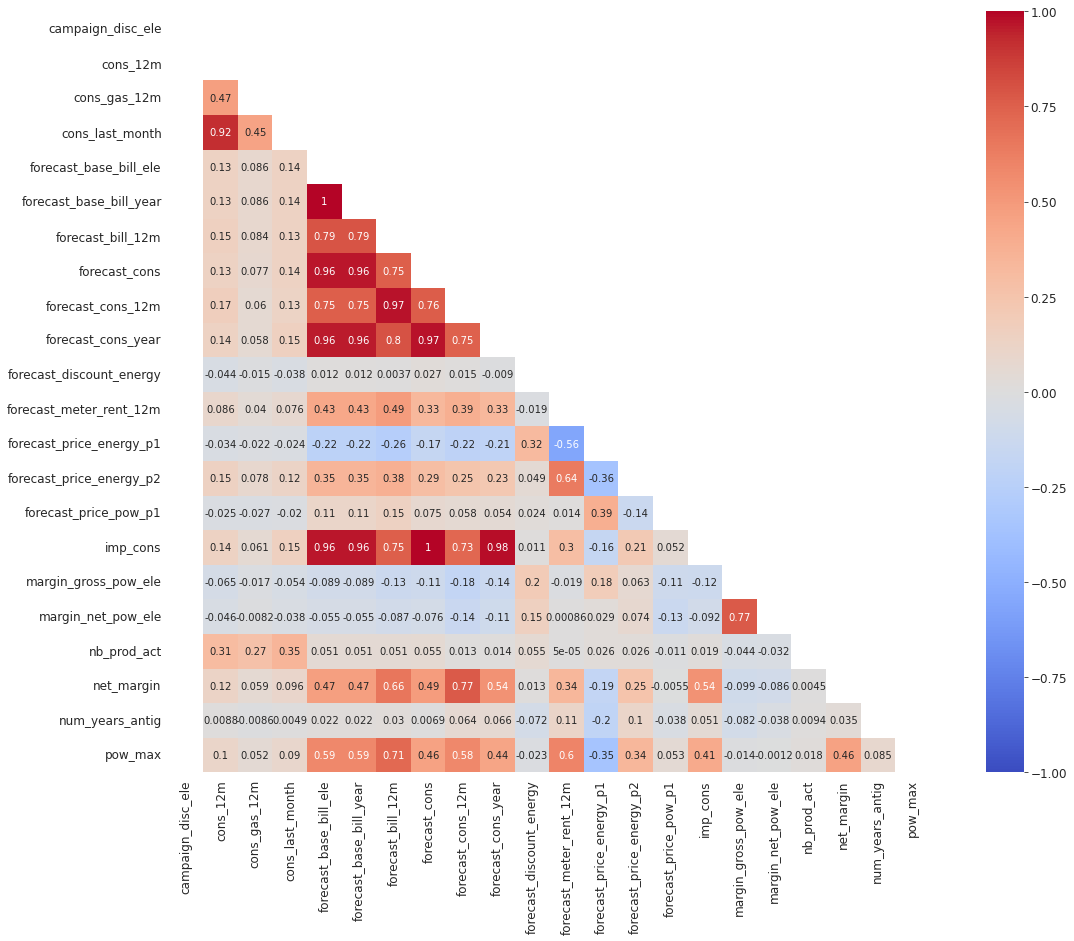

In [65]:
corr =H_C_D.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

Data seems to be veeery clean, on the heatmap the correlation among variables is small and it can avoid multicollinearity for building our machine learning model.

## Calculate Zscore of tenure

In [66]:
tenure_zscores =zscore(H_C_D_df_cc_merged["num_years_antig"])
tenure_zscores

0       -1.228685
1        0.567473
2        0.567473
3        0.567473
4        0.567473
           ...   
15669   -0.629966
15670   -1.228685
15671   -0.629966
15672   -1.228685
15673    0.567473
Name: num_years_antig, Length: 15674, dtype: float64

<AxesSubplot:>

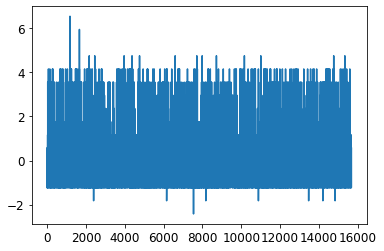

In [67]:
tenure_zscores.plot()

### Change the negative values of tenure Zscores

In [68]:
abs_tenure_zscores = np.abs(tenure_zscores)

<AxesSubplot:>

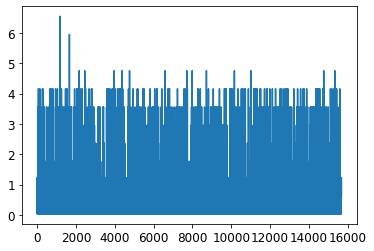

In [69]:
abs_tenure_zscores.plot()

Most of the Zscores values ranges from 1 to 3

### We will compare Churn vs Tenure

In [70]:
churn_tenure = H_C_D_df_cc_merged[["churn","num_years_antig"]]
churn_tenure["zscore"] = abs_tenure_zscores.tolist()
churn_tenure.head()

,churn,num_years_antig,zscore
0,stayed,3,1.228685
1,stayed,6,0.567473
2,stayed,6,0.567473
3,stayed,6,0.567473
4,stayed,6,0.567473


### Remove outliers if zscores above 3

In [71]:
churn_tenure_filtered = churn_tenure[churn_tenure['zscore'] < 3]

In [72]:
churn_tenure_filtered

,churn,num_years_antig,zscore
0,stayed,3,1.228685
1,stayed,6,0.567473
2,stayed,6,0.567473
3,stayed,6,0.567473
4,stayed,6,0.567473
...,...,...,...
15669,stayed,4,0.629966
15670,churned,3,1.228685
15671,churned,4,0.629966
15672,stayed,3,1.228685


### Finding more numeric features

In [73]:
numeric_dtypes = ['int64', 'float64']
numeric = []
for i in H_C_D_df_cc_merged.columns:
    if H_C_D_df_cc_merged[i].dtype in numeric_dtypes:
        if i in ['forecast_cons_12m',"forecast_discount_energy","cons_12m","cons_gas_12m","cons_last_month","forecast_cons_year","nb_prod_act","pow_max"]:
            pass
        else:
            numeric.append(i)

### We will use boxplot to visualize some more outliers in the data values

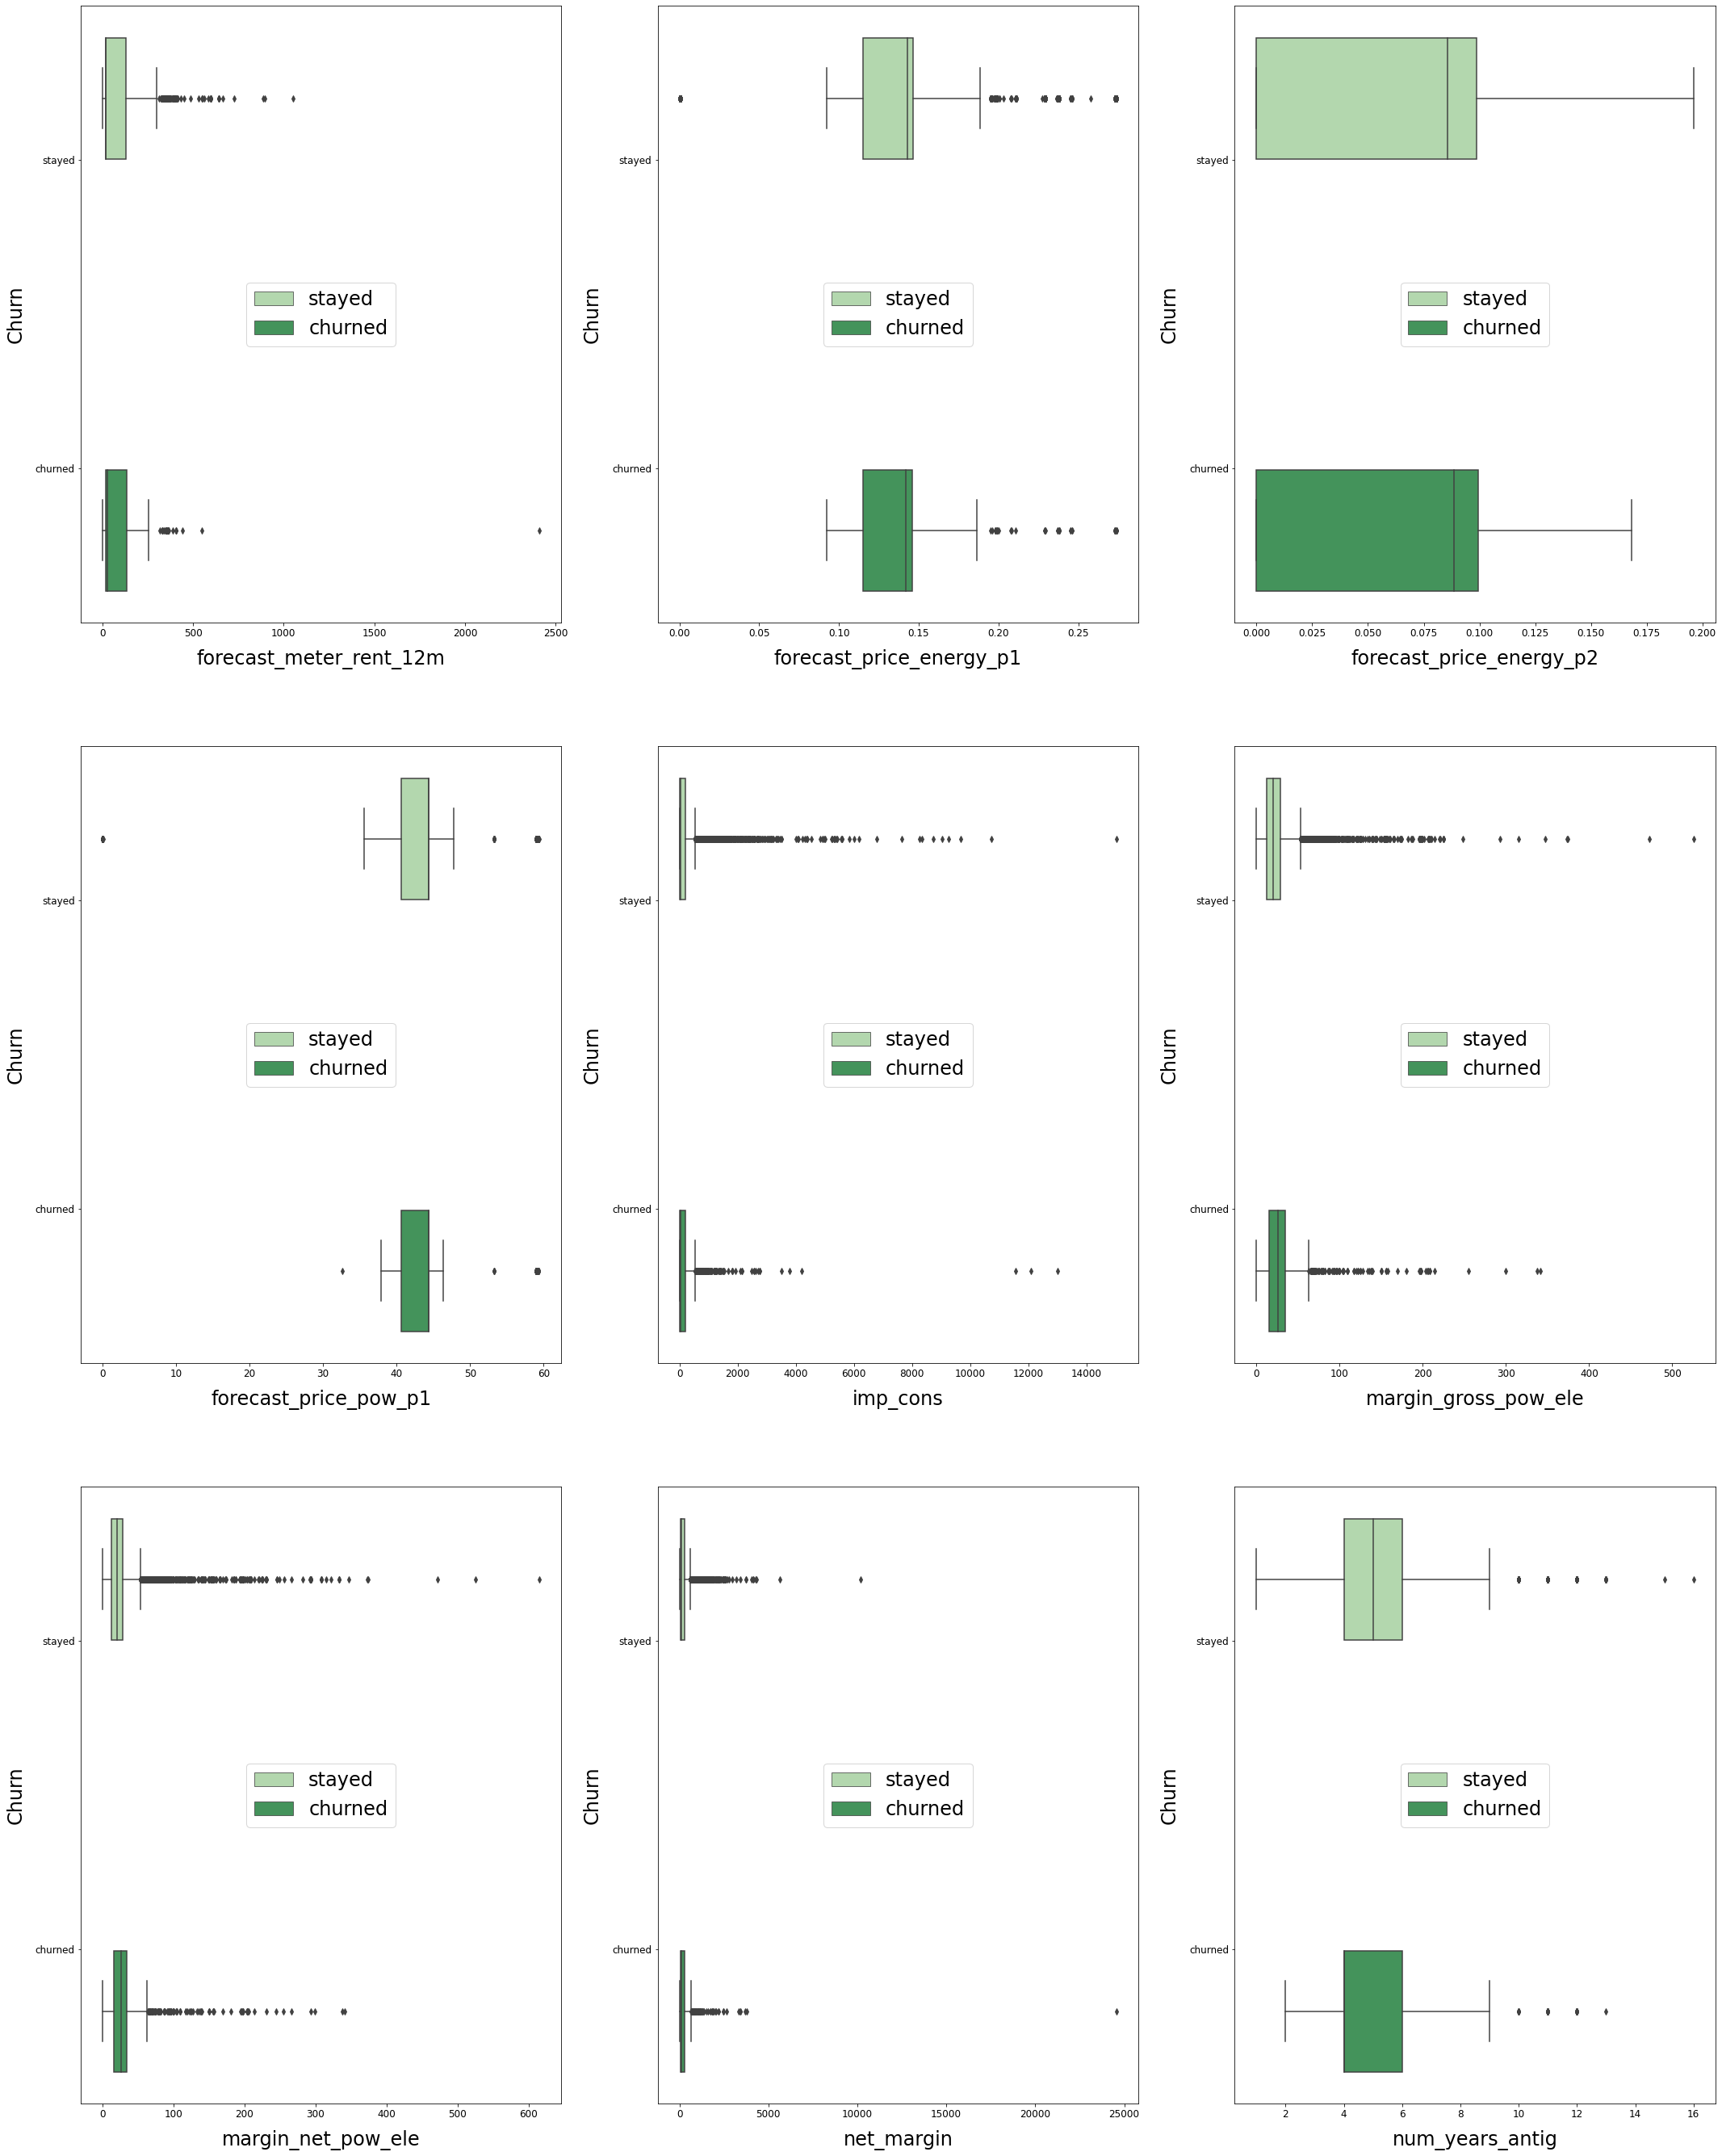

In [74]:
fig, axs = plt.subplots(ncols=2, nrows=1 ,figsize=(15, 60))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(H_C_D_df_cc_merged[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.boxplot(x=feature, y='churn', hue='churn', palette='Greens', data=H_C_D_df_cc_merged)
        
    plt.xlabel('{}'.format(feature), size=24,labelpad=12.5)
    plt.ylabel('Churn', size=24, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='center', prop={'size': 24})
        
plt.show()

## Additional conclutions

<b>Base on the boxplot graph:<b/>
- The median years as customers who are likely to churn is 4 years
- The median years as customers who are likely to stay is 5 years
- Customers are more likely to churn in the 4th year than the 7th
- The graphic show the other features are correlater to each other and Churn

### We will find now the most popular electricity campaign
Code of electricity campaign <b>lxidpiddsbxsbosboudacockeimpuepw</b> is the most popular origin up with 47% currrent customers

In [75]:
elec_popular = H_C_D_df_cc_merged.loc[(H_C_D_df_cc_merged["churn"]>="stayed") & (H_C_D_df_cc_merged["net_margin"]>0),["id", "origin_up","net_margin"]]
elec_popular.value_counts(subset=["origin_up"],normalize=True)

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    0.471093
kamkkxfxxuwbdslkwifmmcsiusiuosws    0.299657
ldkssxwpmemidmecebumciepifcamkci    0.229035
usapbepcfoloekilkwsdiboslwaxobdp    0.000143
ewxeelcelemmiwuafmddpobolfuxioce    0.000072
dtype: float64

### We will find now the highest netting electricity subscription campaign
We can see the correlation between popular electricity with the net margin earned in 2015.

In [76]:
elec_popular.groupby("origin_up")["net_margin"].agg("sum").sort_values(ascending=False)

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1541159.95
ldkssxwpmemidmecebumciepifcamkci     814230.02
kamkkxfxxuwbdslkwifmmcsiusiuosws     717939.95
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64

### We will fing the best 5 customers by tenure and net margin

In [77]:
best_5_customers = H_C_D_df_cc_merged.loc[(H_C_D_df_cc_merged['churn']>='stayed') & (H_C_D_df_cc_merged['net_margin']>0),['id','num_years_antig','net_margin']]
best_5_customers.sort_values(by=['net_margin'],ascending=False).head()

,id,num_years_antig,net_margin
11502,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
6930,78bd1c5c0c67f2be6de89b19df5f8861,3,5625.14
13259,818b8bca0a9d7668252d46b978169325,4,4346.37
8378,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
324,89b3406c3ba717f1b788ceeb5af9e8b9,3,4161.74


## Feature Engineering
Building some new features from the exisitng features that might help the model, starting with contract's tenure.

In [78]:
H_C_D_df_cc_merged = H_C_D_df_cc.merge(right=CH_I,on=["id"])
H_C_D_df_cc_merged

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,Yes,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,stayed
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,Yes,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,stayed
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,Yes,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,stayed
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,Yes,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,stayed
4,568bb38a1afd7c0fc49c77b3789b59a3,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,Yes,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15669,18463073fb097fc0ac5d3e040f356987,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,No,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,stayed
15670,d0a6f71671571ed83b2645d23af6de00,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,Yes,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,churned
15671,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,Yes,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,churned
15672,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,Yes,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,stayed


In [79]:
H_C_D_df_cc_merged.drop(["id","date_modif_prod","date_end","date_renewal","origin_up"],axis=1,inplace=True)

In [80]:
H_C_D_df_cc_merged = H_C_D_df_cc_merged.drop_duplicates(keep='first')

In [81]:
H_C_D_df_cc_merged

,cons_12m,cons_gas_12m,cons_last_month,date_activ,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,309275,0,10025,2012-11-07,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,Yes,831.80,41.76,41.76,1,1732.36,3,180.000,stayed
1,4660,0,0,2009-08-21,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,Yes,0.00,16.38,16.38,1,18.89,6,13.800,stayed
2,544,0,0,2010-04-16,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,Yes,0.00,28.60,28.60,1,6.60,6,13.856,stayed
3,1584,0,0,2010-03-30,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,Yes,0.00,30.22,30.22,1,25.46,6,13.200,stayed
4,121335,0,12400,2010-04-08,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,Yes,1052.37,3.18,3.18,1,823.18,6,75.000,stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15669,32270,47940,0,2012-05-24,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,No,0.00,27.88,27.88,2,381.77,4,15.000,stayed
15670,7223,0,181,2012-08-27,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,Yes,15.94,0.00,0.00,1,90.34,3,6.000,churned
15671,1844,0,179,2012-02-08,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,Yes,18.05,39.84,39.84,1,20.38,4,15.935,churned
15672,131,0,0,2012-08-30,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,Yes,0.00,13.08,13.08,1,0.96,3,11.000,stayed


In [88]:
H_C_D_df_cc_merged = H_C_D_df_cc_merged.drop_duplicates(keep='first')

In [89]:
H_C_D_df_cc_merged

,cons_12m,cons_gas_12m,cons_last_month,date_activ,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,309275,0,10025,2012-11-07,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,Yes,831.80,41.76,41.76,1,1732.36,3,180.000,stayed
1,4660,0,0,2009-08-21,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,Yes,0.00,16.38,16.38,1,18.89,6,13.800,stayed
2,544,0,0,2010-04-16,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,Yes,0.00,28.60,28.60,1,6.60,6,13.856,stayed
3,1584,0,0,2010-03-30,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,Yes,0.00,30.22,30.22,1,25.46,6,13.200,stayed
4,121335,0,12400,2010-04-08,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,Yes,1052.37,3.18,3.18,1,823.18,6,75.000,stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15669,32270,47940,0,2012-05-24,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,No,0.00,27.88,27.88,2,381.77,4,15.000,stayed
15670,7223,0,181,2012-08-27,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,Yes,15.94,0.00,0.00,1,90.34,3,6.000,churned
15671,1844,0,179,2012-02-08,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,Yes,18.05,39.84,39.84,1,20.38,4,15.935,churned
15672,131,0,0,2012-08-30,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,Yes,0.00,13.08,13.08,1,0.96,3,11.000,stayed


In [94]:
H_C_D_df_cc_merged.drop(["date_activ"],axis=1,inplace=True)

In [95]:
H_C_D_df_cc_merged["has_gas"].replace(["No", "Yes"],
                        [0, 1], inplace=True)

In [96]:
H_C_D_df_cc_merged.loc[:,"churn"]

0         stayed
1         stayed
2         stayed
3         stayed
4         stayed
          ...   
15669     stayed
15670    churned
15671    churned
15672     stayed
15673     stayed
Name: churn, Length: 15674, dtype: object

In [98]:
ready_data = H_C_D_df_cc_merged

In [84]:
H_P_D_CH_I_df = H_P_D_CH_I_df.drop_duplicates(keep='first')

In [85]:
H_P_D_CH_I_df

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,stayed
3,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000,stayed
5,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000,stayed
6,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000,stayed
7,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000,stayed
...,...,...,...,...,...,...,...
192702,0.240324,0.000000,0.000000,44.266931,0.000000,0.000000,stayed
192704,0.242632,0.000000,0.000000,44.266931,0.000000,0.000000,stayed
192786,0.148633,0.000000,0.000000,44.444710,0.000000,0.000000,churned
192787,0.149794,0.000000,0.000000,44.444710,0.000000,0.000000,churned


churnData = pd.merge(H_P_D_CH_I_df, H_C_D_df_cc_merged, on="churn", how="left")
churnData.head()

In [92]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35548308 entries, 0 to 35548307
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   price_p1_var              float64
 1   price_p2_var              float64
 2   price_p3_var              float64
 3   price_p1_fix              float64
 4   price_p2_fix              float64
 5   price_p3_fix              float64
 6   churn                     object 
 7   cons_12m                  int64  
 8   cons_gas_12m              int64  
 9   cons_last_month           int64  
 10  date_activ                object 
 11  forecast_cons_12m         float64
 12  forecast_cons_year        int64  
 13  forecast_discount_energy  float64
 14  forecast_meter_rent_12m   float64
 15  forecast_price_energy_p1  float64
 16  forecast_price_energy_p2  float64
 17  forecast_price_pow_p1     float64
 18  has_gas                   object 
 19  imp_cons                  float64
 20  margin_gross_pow_ele  

In [93]:
churnData.loc[:,"churn"]

0           stayed
1           stayed
2           stayed
3           stayed
4           stayed
             ...  
35548303    stayed
35548304    stayed
35548305    stayed
35548306    stayed
35548307    stayed
Name: churn, Length: 35548308, dtype: object

H_C_D_df_cc_merged

churnData["churn"].replace(["churned", "stayed"],
                        [0, 1], inplace=True)

churnData.loc[:,"churn"]

churnData['churn'].value_counts()

churnData.loc[:,"has_gas"]

churnData["has_gas"].replace(["No", "Yes"],
                        [0, 1], inplace=True)

churnData.loc[:,"has_gas"]

# Modeling & Evaluation¶

Split the data into Independent and Dependent variables. 


In [99]:
ready_data.fillna(0,inplace=True)

In [100]:
X=ready_data.drop("churn", axis=1)
y=ready_data.churn

In [101]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15674 entries, 0 to 15673
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cons_12m                  15674 non-null  int64  
 1   cons_gas_12m              15674 non-null  int64  
 2   cons_last_month           15674 non-null  int64  
 3   forecast_cons_12m         15674 non-null  float64
 4   forecast_cons_year        15674 non-null  int64  
 5   forecast_discount_energy  15674 non-null  float64
 6   forecast_meter_rent_12m   15674 non-null  float64
 7   forecast_price_energy_p1  15674 non-null  float64
 8   forecast_price_energy_p2  15674 non-null  float64
 9   forecast_price_pow_p1     15674 non-null  float64
 10  has_gas                   15674 non-null  int64  
 11  imp_cons                  15674 non-null  float64
 12  margin_gross_pow_ele      15674 non-null  float64
 13  margin_net_pow_ele        15674 non-null  float64
 14  nb_pro

In [102]:
ready_data

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,1,831.80,41.76,41.76,1,1732.36,3,180.000,stayed
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,1,0.00,16.38,16.38,1,18.89,6,13.800,stayed
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,1,0.00,28.60,28.60,1,6.60,6,13.856,stayed
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,1,0.00,30.22,30.22,1,25.46,6,13.200,stayed
4,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,1,1052.37,3.18,3.18,1,823.18,6,75.000,stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15669,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,0,0.00,27.88,27.88,2,381.77,4,15.000,stayed
15670,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,1,15.94,0.00,0.00,1,90.34,3,6.000,churned
15671,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,1,18.05,39.84,39.84,1,20.38,4,15.935,churned
15672,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,1,0.00,13.08,13.08,1,0.96,3,11.000,stayed


## Upsampling using SMOTE

In [103]:
y.value_counts()

stayed     14154
churned     1520
Name: churn, dtype: int64

In [104]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

stayed     14154
churned    14154
Name: churn, dtype: int64

## Splitting the data

Next we will split the data into training and validation data (75%-25%)
We also use a random state generator in order to split it randomly.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=18)

,Error_metric,Train,Test
0,Accuracy,0.903382,0.902615
1,Precision,1.000000,0.000000
2,Recall,0.002822,0.000000


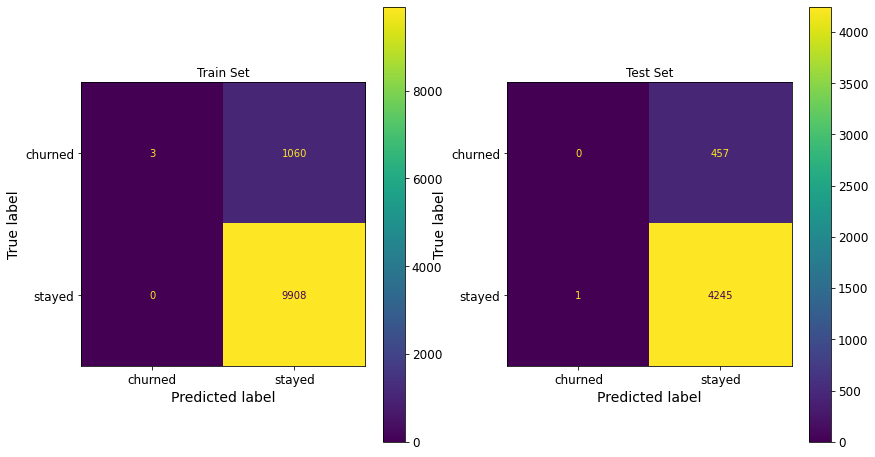

In [109]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label= "churned"),
                                         recall_score(y_train, y_pred_train_dt, pos_label= "churned")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label= "churned"),
                                        recall_score(y_test, y_pred_test_dt, pos_label= "churned")]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

0.9046575940676094


,Error_metric,Train,Test
0,Accuracy,1.0,0.906868
1,Precision,1.0,0.806452
2,Recall,1.0,0.054705


Confusion matrix for the train set
[[1063    0]
 [   0 9908]]


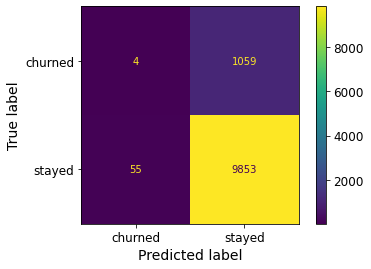



Confusion matrix for the test set
[[  25  432]
 [   6 4240]]


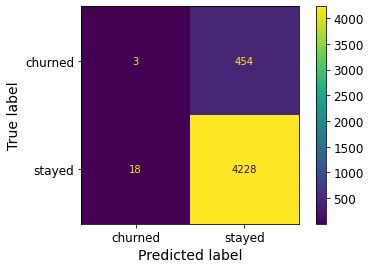

In [120]:
forest_model= RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(forest_model, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

forest_model.fit(X_train, y_train)

y_pred_train_log = forest_model.predict(X_train)
y_pred_test_log = forest_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label= "churned"),
                                         recall_score(y_train, y_pred_train_log, pos_label= "churned")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label= "churned"),
                                        recall_score(y_test, y_pred_test_log, pos_label= "churned")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

,Error_metric,Train,Test
0,Accuracy,0.898460,0.899639
1,Precision,0.067797,0.142857
2,Recall,0.003763,0.006565


Confusion matrix for the train set
[[   4 1059]
 [  55 9853]]


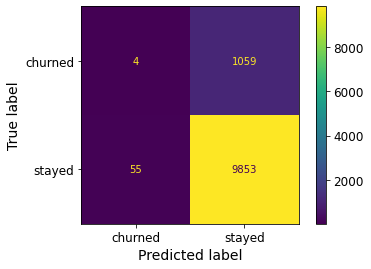



Confusion matrix for the test set
[[   3  454]
 [  18 4228]]


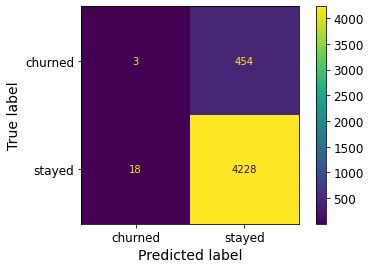

In [117]:
log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label= "churned"),
                                         recall_score(y_train, y_pred_train_log, pos_label= "churned")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label= "churned"),
                                        recall_score(y_test, y_pred_test_log, pos_label= "churned")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

We are going to evaluate our model on our test data (which we did not use for training) using the evalution metrics of:

In [118]:
def evaluate(model_, X_test_, y_test_):
 
    prediction_test_ = model_.predict(X_test_)

    results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
    "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
    "Recall" : [metrics.recall_score(y_test_, prediction_test_)]})
    
    return results

In [119]:
evaluate(model, X_test, y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#####

#######

In [ ]:
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))